# About the Topic

#HR analytics is the process of collecting and analyzing Human Resource (HR) data in order to improve an organization's workforce performance. The process can also be referred to as talent analytics, people analytics, or even workforce analytics.
#Attrition is a process in which the workforce dwindles at a company, following a period in which a number of people retire or resign, and are not replaced.

# About The Dataset

A HR dataset was sourced from IBM HR Analytics Employee Attrition & Performance which contains employee data for 1,470 employees with various information about the employees.

# Importing Essential Libraries

In [84]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# Reading The Data

In [85]:
df=pd.read_csv("C:\\Users\\DELL\\Desktop\\hr.csv")
df.head(10)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
5,32,No,Travel_Frequently,1005,Research & Development,2,2,Life Sciences,1,8,...,3,80,0,8,2,2,7,7,3,6
6,59,No,Travel_Rarely,1324,Research & Development,3,3,Medical,1,10,...,1,80,3,12,3,2,1,0,0,0
7,30,No,Travel_Rarely,1358,Research & Development,24,1,Life Sciences,1,11,...,2,80,1,1,2,3,1,0,0,0
8,38,No,Travel_Frequently,216,Research & Development,23,3,Life Sciences,1,12,...,2,80,0,10,2,3,9,7,1,8
9,36,No,Travel_Rarely,1299,Research & Development,27,3,Medical,1,13,...,2,80,2,17,3,2,7,7,7,7


In [86]:
df.shape

(1470, 35)

In [87]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

We can notice that some of the variables present in the dataset are categorical in nature. Therefore, we will be encoding the neccesary variables into numerical form.

We can also notice that there is no missing data in the dataset.

In [88]:
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


##Major Highlights of data
#The dataset contains the info of employees aged b/w 18-60.
#The employees are travelling to thier workplace with 1km being min distance and 29km being largest distance.
#Employees are working at an hourly rate of 65 having 7 years of total working hours as an average.


In [89]:
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

There are no null values.

# EXPLORATORY DATA ANALYSIS

# Univariate Analysis

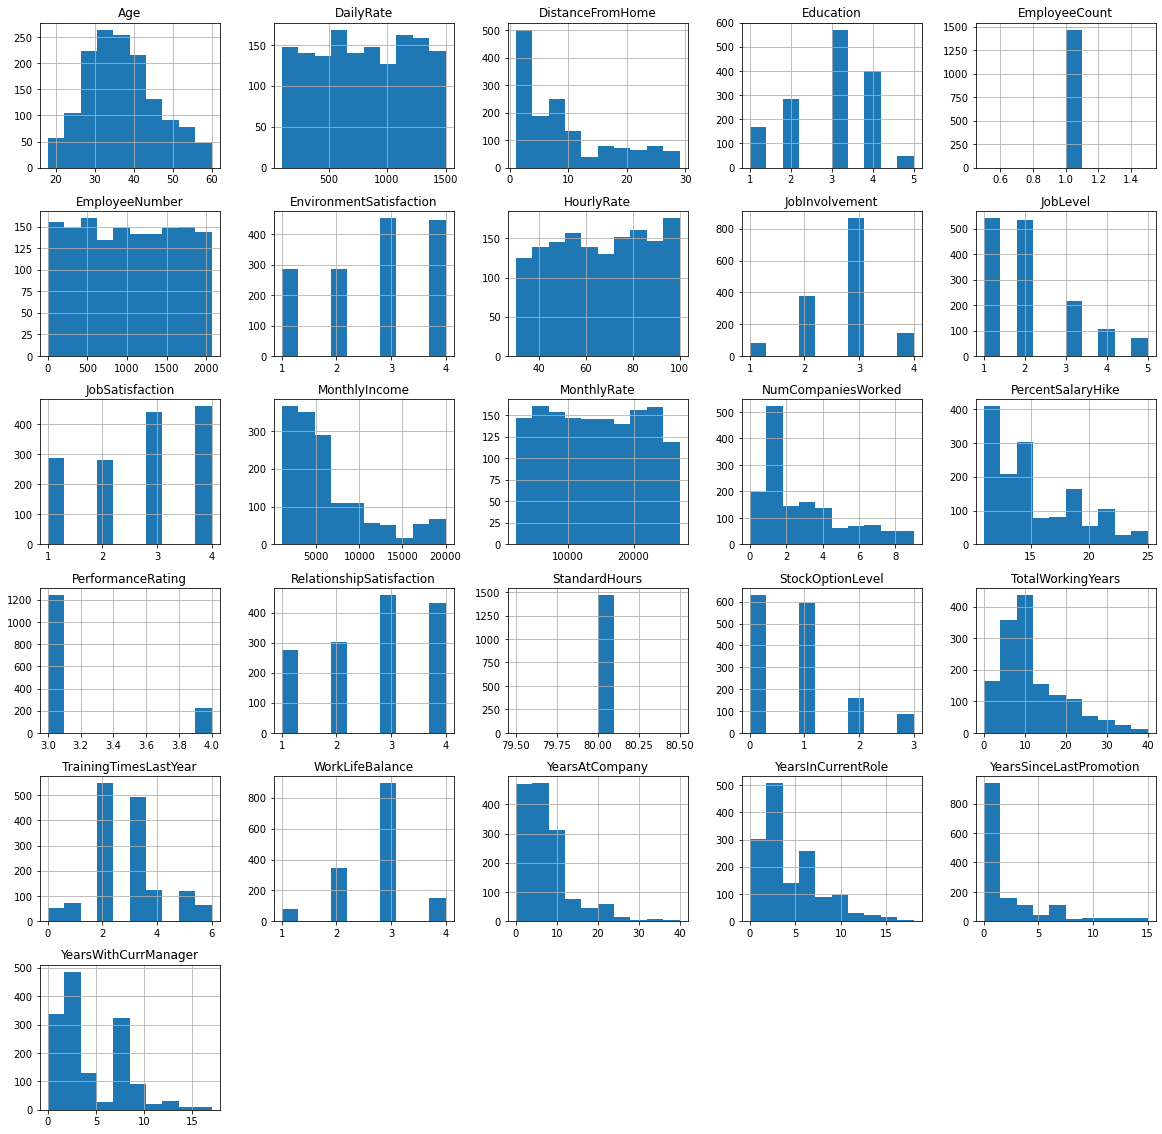

In [90]:
df.hist(figsize=(20,20))
plt.show()

##Observation
#1.Most of the employees are aged between 25-45.
#2.Most of the graphs are skewed like MonthlyIncome DistanceFromHome, YearsAtCompany, TotalWorkingYears.
#3.The unnecessary variables are EmployeeCount & StandardHours. We will be dropping those.

In [91]:
df.drop(['EmployeeCount','StandardHours'],axis=1,inplace=True)

In [92]:
df['BusinessTravel'].value_counts()

Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: BusinessTravel, dtype: int64

In [93]:
df['Attrition'].value_counts()

No     1233
Yes     237
Name: Attrition, dtype: int64

In [94]:
df['Department'].value_counts()

Research & Development    961
Sales                     446
Human Resources            63
Name: Department, dtype: int64

In [95]:
df['EducationField'].value_counts()

Life Sciences       606
Medical             464
Marketing           159
Technical Degree    132
Other                82
Human Resources      27
Name: EducationField, dtype: int64

In [96]:
df['Gender'].value_counts()

Male      882
Female    588
Name: Gender, dtype: int64

In [97]:
df['JobRole'].value_counts()

Sales Executive              326
Research Scientist           292
Laboratory Technician        259
Manufacturing Director       145
Healthcare Representative    131
Manager                      102
Sales Representative          83
Research Director             80
Human Resources               52
Name: JobRole, dtype: int64

In [98]:
df['MaritalStatus'].value_counts()

Married     673
Single      470
Divorced    327
Name: MaritalStatus, dtype: int64

In [99]:
df['Over18'].value_counts()

Y    1470
Name: Over18, dtype: int64

We will remove this column has only one-type therefore we will be removing it. 

In [100]:
df.drop(['Over18'],axis=1,inplace=True)

In [101]:
df['OverTime'].value_counts()

No     1054
Yes     416
Name: OverTime, dtype: int64

In [102]:
df.shape

(1470, 32)

We will be performing Encoding on these categorical variables in the later stages of analysis.

# Bivariate Analysis

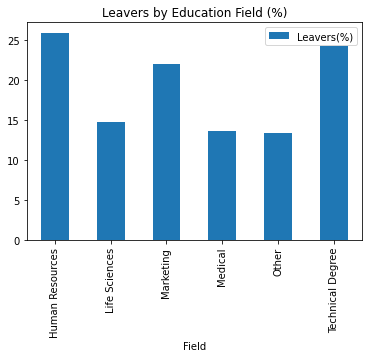

In [103]:
#Attrition vs Field 
df_edu = pd.DataFrame(columns=["Field", "Leavers(%)"])
i=0
for field in list(df['EducationField'].unique()):
    ratio = df[(df['EducationField']==field)&(df['Attrition']=="Yes")].shape[0] / df[df['EducationField']==field].shape[0]
    df_edu.loc[i] = (field, ratio*100)
    i += 1
df_new = df_edu.groupby(by="Field").sum()
df_new.plot(kind='bar',title='Leavers by Education Field (%)')

Most of the people who left are have studied HR or Technology

(array([0, 1, 2]), <a list of 3 Text major ticklabel objects>)

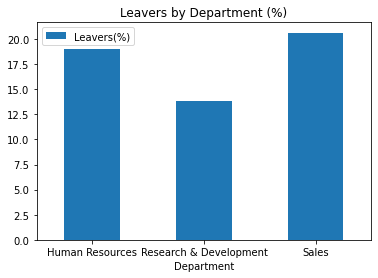

In [104]:
#Attrition vs Department 
df_dep = pd.DataFrame(columns=["Department", "Leavers(%)"])
i=0
for field in list(df['Department'].unique()):
    ratio = df[(df['Department']==field)&(df['Attrition']=="Yes")].shape[0] / df[df['Department']==field].shape[0]
    df_dep.loc[i] = (field, ratio*100)
    i += 1
df_new = df_dep.groupby(by="Department").sum()
df_new.plot(kind='bar',title='Leavers by Department (%)')
plt.xticks(rotation=0)

People from sales department leaves the company more often than others.

(array([0, 1]), <a list of 2 Text major ticklabel objects>)

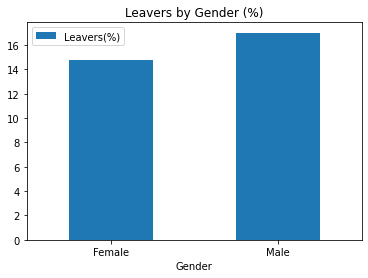

In [105]:
#Attrition vs Gender 
df_gen = pd.DataFrame(columns=["Gender", "Leavers(%)"])
i=0
for field in list(df["Gender"].unique()):
    ratio = df[(df["Gender"]==field)&(df['Attrition']=="Yes")].shape[0] / df[df["Gender"]==field].shape[0]
    df_gen.loc[i] = (field, ratio*100)
    i += 1
df_new = df_gen.groupby(by="Gender").sum()
df_new.plot(kind='bar',title='Leavers by Gender (%)')
plt.xticks(rotation=0)

Males have the higher probability of attrition.

(array([0, 1, 2]), <a list of 3 Text major ticklabel objects>)

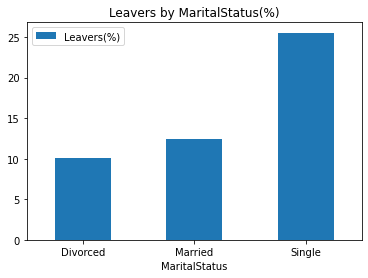

In [106]:
#Attrition vs Marital Status 
df_ms = pd.DataFrame(columns=["MaritalStatus", "Leavers(%)"])
i=0
for field in list(df["MaritalStatus"].unique()):
    ratio = df[(df["MaritalStatus"]==field)&(df['Attrition']=="Yes")].shape[0] / df[df["MaritalStatus"]==field].shape[0]
    df_ms.loc[i] = (field, ratio*100)
    i += 1
df_new = df_ms.groupby(by="MaritalStatus").sum()
df_new.plot(kind='bar',title='Leavers by MaritalStatus(%)')
plt.xticks(rotation=0)

Single employees have the higher probability of attrition.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42]),
 <a list of 43 Text major ticklabel objects>)

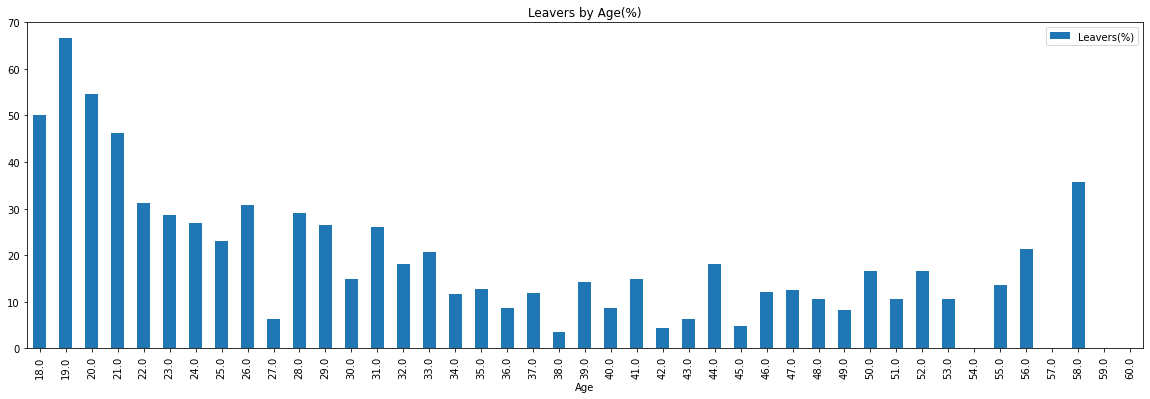

In [107]:
#Attrition vs Marital Status 
df_ag = pd.DataFrame(columns=["Age", "Leavers(%)"])
i=0
for field in list(df["Age"].unique()):
    ratio = df[(df["Age"]==field)&(df['Attrition']=="Yes")].shape[0] / df[df["Age"]==field].shape[0]
    df_ag.loc[i] = (field, ratio*100)
    i += 1
df_new = df_ag.groupby(by="Age").sum()
df_new.plot(kind='bar',title='Leavers by Age(%)',figsize=(20,6))
plt.xticks(rotation=90)

# Encoding the data

In [108]:
# Import label encoder 
from sklearn import preprocessing
col=['Attrition','BusinessTravel','Department','EducationField','Gender','JobRole','MaritalStatus','OverTime']
i=0
for i in col:
    le = preprocessing.LabelEncoder()
    # Encoding categorical columns
    df[i]= le.fit_transform(df[i])
print(df.head())

   Age  Attrition  BusinessTravel  DailyRate  Department  DistanceFromHome  \
0   41          1               2       1102           2                 1   
1   49          0               1        279           1                 8   
2   37          1               2       1373           1                 2   
3   33          0               1       1392           1                 3   
4   27          0               2        591           1                 2   

   Education  EducationField  EmployeeNumber  EnvironmentSatisfaction  ...  \
0          2               1               1                        2  ...   
1          1               1               2                        3  ...   
2          2               4               4                        4  ...   
3          4               1               5                        4  ...   
4          1               3               7                        1  ...   

   PerformanceRating  RelationshipSatisfaction  StockOptionLev

In [109]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 32 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   Age                       1470 non-null   int64
 1   Attrition                 1470 non-null   int32
 2   BusinessTravel            1470 non-null   int32
 3   DailyRate                 1470 non-null   int64
 4   Department                1470 non-null   int32
 5   DistanceFromHome          1470 non-null   int64
 6   Education                 1470 non-null   int64
 7   EducationField            1470 non-null   int32
 8   EmployeeNumber            1470 non-null   int64
 9   EnvironmentSatisfaction   1470 non-null   int64
 10  Gender                    1470 non-null   int32
 11  HourlyRate                1470 non-null   int64
 12  JobInvolvement            1470 non-null   int64
 13  JobLevel                  1470 non-null   int64
 14  JobRole                   1470 non-null 

Now all the data is numerical in nature

# Correlation

In [110]:
cor=df.corr()
cor

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
Age,1.000000,-0.159205,0.024751,0.010661,-0.031882,-0.001686,0.208034,-0.040873,-0.010145,0.010146,...,0.001904,0.053535,0.037510,0.680381,-0.019621,-0.021490,0.311309,0.212901,0.216513,0.202089
Attrition,-0.159205,1.000000,0.000074,-0.056652,0.063991,0.077924,-0.031373,0.026846,-0.010577,-0.103369,...,0.002889,-0.045872,-0.137145,-0.171063,-0.059478,-0.063939,-0.134392,-0.160545,-0.033019,-0.156199
BusinessTravel,0.024751,0.000074,1.000000,-0.004086,-0.009044,-0.024469,0.000757,0.023724,-0.015578,0.004174,...,-0.026341,-0.035986,-0.016727,0.034226,0.015240,-0.011256,-0.014575,-0.011497,-0.032591,-0.022636
DailyRate,0.010661,-0.056652,-0.004086,1.000000,0.007109,-0.004985,-0.016806,0.037709,-0.050990,0.018355,...,0.000473,0.007846,0.042143,0.014515,0.002453,-0.037848,-0.034055,0.009932,-0.033229,-0.026363
Department,-0.031882,0.063991,-0.009044,0.007109,1.000000,0.017225,0.007996,0.013720,-0.010895,-0.019395,...,-0.024604,-0.022414,-0.012193,-0.015762,0.036875,0.026383,0.022920,0.056315,0.040061,0.034282
DistanceFromHome,-0.001686,0.077924,-0.024469,-0.004985,0.017225,1.000000,0.021042,0.002013,0.032916,-0.016075,...,0.027110,0.006557,0.044872,0.004628,-0.036942,-0.026556,0.009508,0.018845,0.010029,0.014406
Education,0.208034,-0.031373,0.000757,-0.016806,0.007996,0.021042,1.000000,-0.039592,0.042070,-0.027128,...,-0.024539,-0.009118,0.018422,0.148280,-0.025100,0.009819,0.069114,0.060236,0.054254,0.069065
EducationField,-0.040873,0.026846,0.023724,0.037709,0.013720,0.002013,-0.039592,1.000000,-0.002516,0.043163,...,-0.005614,-0.004378,-0.016185,-0.027848,0.049195,0.041191,-0.018692,-0.010506,0.002326,-0.004130
EmployeeNumber,-0.010145,-0.010577,-0.015578,-0.050990,-0.010895,0.032916,0.042070,-0.002516,1.000000,0.017621,...,-0.020359,-0.069861,0.062227,-0.014365,0.023603,0.010309,-0.011240,-0.008416,-0.009019,-0.009197
EnvironmentSatisfaction,0.010146,-0.103369,0.004174,0.018355,-0.019395,-0.016075,-0.027128,0.043163,0.017621,1.000000,...,-0.029548,0.007665,0.003432,-0.002693,-0.019359,0.027627,0.001458,0.018007,0.016194,-0.004999


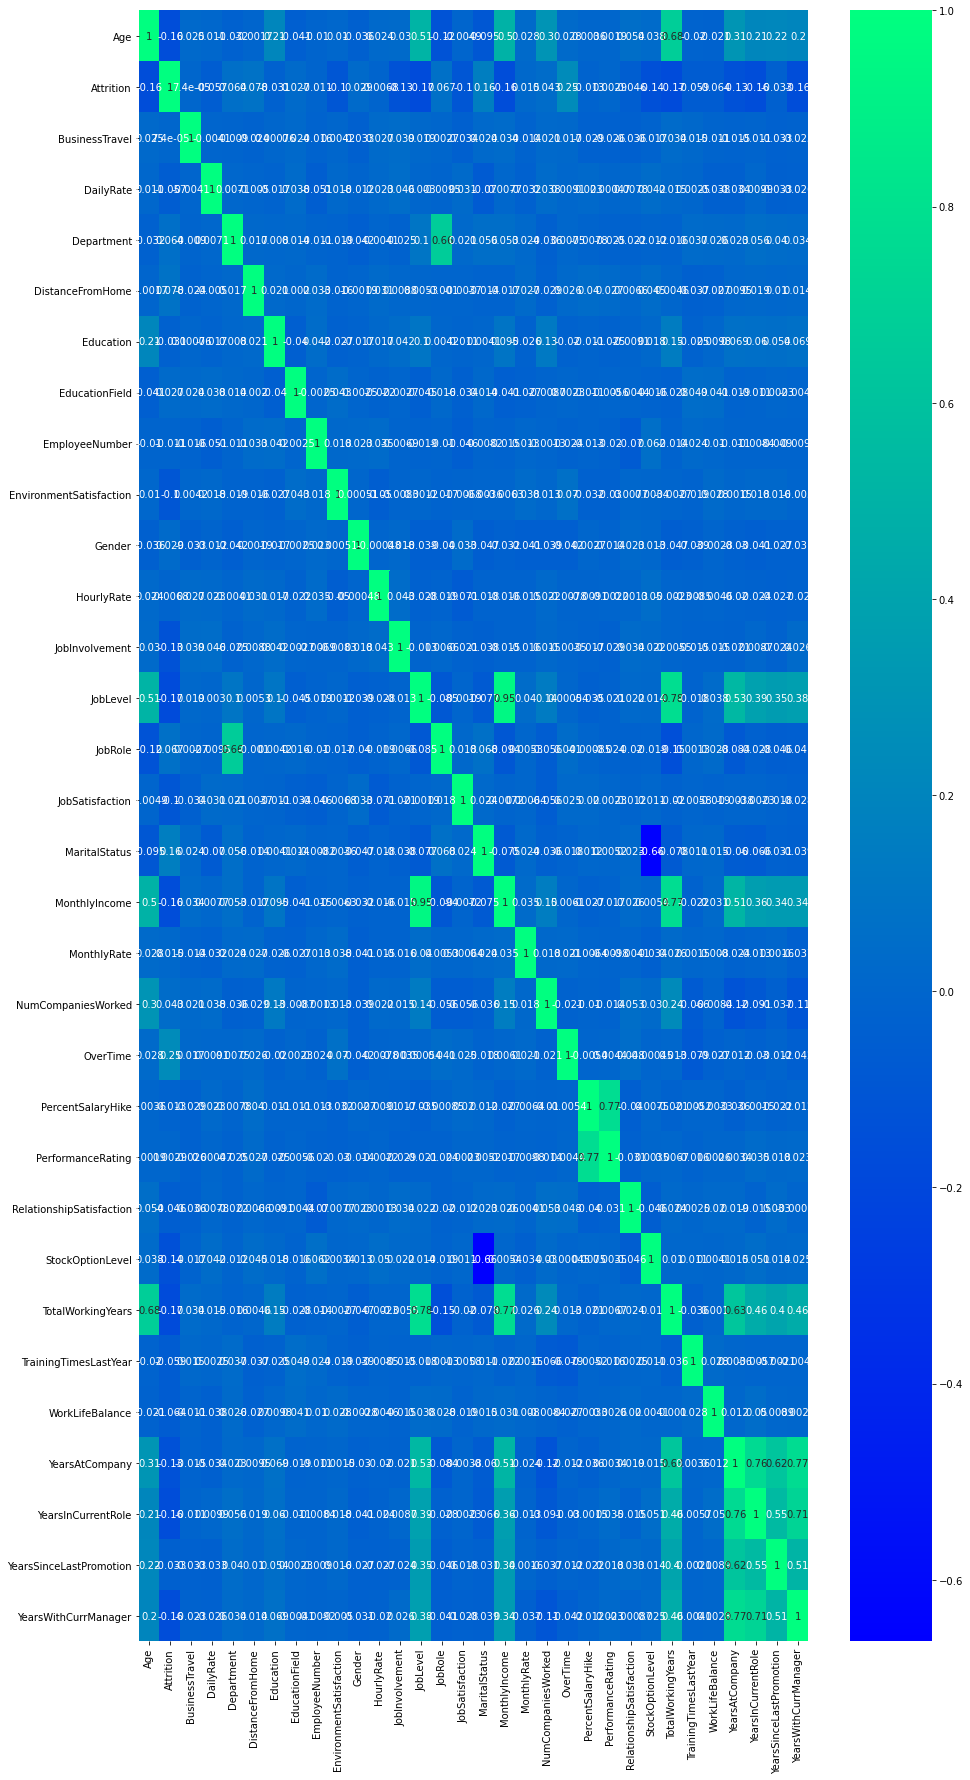

In [111]:
plt.figure(figsize=(15,30))
sns.heatmap(cor,annot=True,cmap="winter")

#The strongest positive correlations can be seen for the variables Performance Rating, Monthly Rate, Num Companies Worked, Distance From Home.
#The strongest negative correlations can be seen for the variables Total Working Years, Job Level, Years In Current Role, and Monthly Income.

# Removing Skewness

In [112]:
#Spliitng the data and target variable
x=df.drop(['Attrition'],axis=1)
y=df['Attrition']

In [113]:
x.skew()

Age                         0.413286
BusinessTravel             -1.439006
DailyRate                  -0.003519
Department                  0.172231
DistanceFromHome            0.958118
Education                  -0.289681
EducationField              0.550371
EmployeeNumber              0.016574
EnvironmentSatisfaction    -0.321654
Gender                     -0.408665
HourlyRate                 -0.032311
JobInvolvement             -0.498419
JobLevel                    1.025401
JobRole                    -0.357270
JobSatisfaction            -0.329672
MaritalStatus              -0.152175
MonthlyIncome               1.369817
MonthlyRate                 0.018578
NumCompaniesWorked          1.026471
OverTime                    0.964489
PercentSalaryHike           0.821128
PerformanceRating           1.921883
RelationshipSatisfaction   -0.302828
StockOptionLevel            0.968980
TotalWorkingYears           1.117172
TrainingTimesLastYear       0.553124
WorkLifeBalance            -0.552480
Y

In [115]:
#Treating skewness via log method
for col in x.columns:
    if x[col].skew()>0.7:
        x[col]=np.log1p(x[col])

# Scaling the Data

In [116]:
from sklearn.preprocessing import MinMaxScaler
mm=MinMaxScaler(feature_range=(0, 5))
x=mm.fit_transform(x)

In [117]:
#Coverting to train and test data
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=42)

# Model Training

As our data target variable is categorical there we will be using classification techniques.

In [118]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
from sklearn.metrics import accuracy_score

In [119]:
from sklearn.model_selection import KFold, cross_val_score, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier, RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [120]:
models= [LogisticRegression(),SVC(),DecisionTreeClassifier(),KNeighborsClassifier(),GaussianNB()]
for m in models:
    m.fit(x_train,y_train)
    print("Score of ",m," :",m.score(x_train,y_train))
    predm=m.predict(x_test)
    print('Scores')
    print("Accuracy Score : ",accuracy_score(y_test,predm))     
    print("--------------------------------------------------------------------------------------------")
    print("\n")

Score of  LogisticRegression()  : 0.8758503401360545
Scores
Accuracy Score :  0.8843537414965986
--------------------------------------------------------------------------------------------


Score of  SVC()  : 0.9124149659863946
Scores
Accuracy Score :  0.8775510204081632
--------------------------------------------------------------------------------------------


Score of  DecisionTreeClassifier()  : 1.0
Scores
Accuracy Score :  0.7687074829931972
--------------------------------------------------------------------------------------------


Score of  KNeighborsClassifier()  : 0.8767006802721088
Scores
Accuracy Score :  0.8639455782312925
--------------------------------------------------------------------------------------------


Score of  GaussianNB()  : 0.8171768707482994
Scores
Accuracy Score :  0.8333333333333334
--------------------------------------------------------------------------------------------




We are getting best accuracy at using Logistic Regression.

In [121]:
#Cross Validating
models= [LogisticRegression(),SVC(),DecisionTreeClassifier(),KNeighborsClassifier(),GaussianNB()]
for m in models:
    score=cross_val_score(m,x,y,cv=4,scoring="accuracy")
    print("Score of ",m," is :",score)
    print("Mean Score : ",score.mean())
    print("Standard Deviation : ",score.std())
    print("--------------------------------------------------------------------------------------------")
    print("\n")

Score of  LogisticRegression()  is : [0.88858696 0.86684783 0.86920981 0.8746594 ]
Mean Score :  0.87482599810449
Standard Deviation :  0.008434816790216496
--------------------------------------------------------------------------------------------


Score of  SVC()  is : [0.85869565 0.85869565 0.85286104 0.8773842 ]
Mean Score :  0.8619091339888638
Standard Deviation :  0.00924660165145342
--------------------------------------------------------------------------------------------


Score of  DecisionTreeClassifier()  is : [0.77445652 0.7798913  0.80926431 0.78201635]
Mean Score :  0.7864071200094775
Standard Deviation :  0.013481491373240605
--------------------------------------------------------------------------------------------


Score of  KNeighborsClassifier()  is : [0.84782609 0.83967391 0.84468665 0.86376022]
Mean Score :  0.8489867166212534
Standard Deviation :  0.009011413596619415
-------------------------------------------------------------------------------------------

After Cross Validation we are getting best scores using Logistic Regression.

In [122]:
#LogisticRegression is the best model so we will find out it's best parameter using GridSearchCV
lr=LogisticRegression()
parameters = {'penalty':['l1', 'l2', 'elasticnet', 'none'],
          'random_state':range(0,100)}
clf=GridSearchCV(lr,parameters)
clf.fit(x,y)
clf.best_params_

{'penalty': 'l2', 'random_state': 0}

Best parameters: Penalty:'l2' & random_state=0

In [123]:
#Using LogisticRegression method with best parameters
lr=LogisticRegression(penalty='l2',random_state=0)
lr.fit(x_train,y_train)
print("Score of ",lr," :",lr.score(x_train,y_train))
predlr=lr.predict(x_test)
print('Scores')
print("Accuracy Score : ",accuracy_score(y_test,predlr))
print("Classification Report : \n",classification_report(y_test,predlr))
print("Confusion_matrix : ",confusion_matrix(y_test,predlr))
print("--------------------------------------------------------------------------------------------")
print("\n")

Score of  LogisticRegression(random_state=0)  : 0.8758503401360545
Scores
Accuracy Score :  0.8843537414965986
Classification Report : 
               precision    recall  f1-score   support

           0       0.90      0.97      0.94       255
           1       0.62      0.33      0.43        39

    accuracy                           0.88       294
   macro avg       0.76      0.65      0.68       294
weighted avg       0.87      0.88      0.87       294

Confusion_matrix :  [[247   8]
 [ 26  13]]
--------------------------------------------------------------------------------------------




We are getting an accuracy of 88% using Logistic Regression

# Using Ensemble Methods for boosting the accuracy

In [124]:
#Random Forest
rf=RandomForestClassifier(n_estimators=20,random_state=0)
rf.fit(x_train,y_train)
predrf=rf.predict(x_test)
print('Scores')
print("Accuracy Score : ",accuracy_score(y_test,predrf))
print("Classification Report : \n",classification_report(y_test,predrf))
print("Confusion_matrix : ",confusion_matrix(y_test,predrf))
print("--------------------------------------------------------------------------------------------")
print("\n")

Scores
Accuracy Score :  0.8707482993197279
Classification Report : 
               precision    recall  f1-score   support

           0       0.88      0.99      0.93       255
           1       0.60      0.08      0.14        39

    accuracy                           0.87       294
   macro avg       0.74      0.53      0.53       294
weighted avg       0.84      0.87      0.82       294

Confusion_matrix :  [[253   2]
 [ 36   3]]
--------------------------------------------------------------------------------------------




In [125]:
ad=AdaBoostClassifier(n_estimators=20,random_state=0)
ad.fit(x_train,y_train)
predad=ad.predict(x_test)
print('Scores')
print("Accuracy Score : ",accuracy_score(y_test,predad))
print("Classification Report : \n",classification_report(y_test,predad))
print("Confusion_matrix : ",confusion_matrix(y_test,predad))
print("--------------------------------------------------------------------------------------------")
print("\n")

Scores
Accuracy Score :  0.8741496598639455
Classification Report : 
               precision    recall  f1-score   support

           0       0.89      0.97      0.93       255
           1       0.56      0.23      0.33        39

    accuracy                           0.87       294
   macro avg       0.73      0.60      0.63       294
weighted avg       0.85      0.87      0.85       294

Confusion_matrix :  [[248   7]
 [ 30   9]]
--------------------------------------------------------------------------------------------




This shows that the accuracy score remains same as of Logistic Regression model.

# Best Model For Prediction : Logistic Regression

# Saving the Model

In [126]:
import joblib
joblib.dump(lr,"HR_Attrication.pkl")

['HR_Attrication.pkl']